# dexined

# import

In [1]:
import numpy as np, cv2
import matplotlib.pylab as plt
import os
import cv2
import kornia


!git clone https://github.com/xavysp/DexiNed.git

!cd DexiNed

# Folder 

In [83]:
img_dir = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\ori' 


output_folder = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\CLASSIC'  


# image processing

# 여러 전처리 중에 가장 선명한건 흑백변환-> 히스토그램 평탄화 -> 가우시안 블러 

## 가우시안 -> 흑백

`-` wear

```python
# Define the directory containing the images

counter = 0

# Iterate over all images in the directory
for filename in os.listdir(img_dir):
    
    if ("ori_wear" in filename ) and (filename.endswith(".jpg") or filename.endswith(".png")):
        # Load the image in grayscale mode
        
        
        img_gray = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)

        # 가우시안 블러 적용
        blurred_img = cv2.GaussianBlur(img_gray, (5, 5), 0)

        # Save the processed image with a new name in the same directory
        new_filename = f"wear_ga_bg_{counter}.jpg"
        cv2.imwrite(os.path.join(output_folder, new_filename), blurred_img)

        # Increment the counter
        counter += 1
```       
        

`-` nor


```python

counter = 0

# Iterate over all images in the directory
for filename in os.listdir(img_dir):
    
    if ("ori_nor" in filename ) and (filename.endswith(".jpg") or filename.endswith(".png")):
        # Load the image in grayscale mode
        
        
        img_gray = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)

        # 가우시안 블러 적용
        blurred_img = cv2.GaussianBlur(img_gray, (5, 5), 0)

        # Save the processed image with a new name in the same directory
        new_filename = f"Nor_ga_bg__{counter}.jpg"
        cv2.imwrite(os.path.join(output_folder, new_filename), blurred_img)

        # Increment the counter
        counter += 1
```

## 흑백변환 -> CLAHE -> 가우시안 블러

`-` wear

In [84]:



counter = 0

# Iterate over all images in the directory
for filename in os.listdir(img_dir):
    
        img_gray = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)

        # Apply CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        img_clahe = clahe.apply(img_gray)

        # Apply Gaussian blur
        img_gauss = cv2.GaussianBlur(img_clahe, (5, 5), 0)

        # Save the processed image with a new name in the same directory
        new_filename = f"wear_cl_ga_bg_{counter}.jpg"
        cv2.imwrite(os.path.join(output_folder, new_filename), img_gauss)

        # Increment the counter
        counter += 1


`-` nor

In [85]:

# Define the directory containing the images

counter = 0

# Iterate over all images in the directory
for filename in os.listdir(img_dir):
    
    if ("ori_nor" in filename ) and (filename.endswith(".jpg") or filename.endswith(".png")):
        # Load the image in grayscale mode
        img_gray = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)

        # Apply CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        img_clahe = clahe.apply(img_gray)

        # Apply Gaussian blur
        img_gauss = cv2.GaussianBlur(img_clahe, (5, 5), 0)

        # Save the processed image with a new name in the same directory
        new_filename = f"Nor_cl_ga_bg_{counter}.jpg"
        cv2.imwrite(os.path.join(output_folder, new_filename), img_gauss)

        # Increment the counter
        counter += 1


## 히스토그램 스트레칭

`-` wear


```python
counter = 0

# Iterate over all images in the directory
for filename in os.listdir(img_dir):
    # Only process the images with 'ori' in the filename
    if ("ori_wear" in filename) and (filename.endswith(".jpg") or filename.endswith(".png")):
        # Load the image in grayscale mode
        img_gray = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)
        
        print(filename)

        # Apply histogram stretching
        minval = np.min(img_gray)
        maxval = np.max(img_gray)
        img_stretched = (img_gray - minval) / (maxval - minval) * 255
        img_stretched = img_stretched.astype(np.uint8)

        # Apply Gaussian blur
        img_gauss = cv2.GaussianBlur(img_stretched, (5, 5), 0)

        # Save the processed image with a new name in the same directory
        new_filename = f"wear_hs_ga_bg_{counter}.jpg"
        cv2.imwrite(os.path.join(output_folder, new_filename), img_gauss)

        # Increment the counter
        counter += 1

```

`-` Nor

```python
counter = 0

# Iterate over all images in the directory
for filename in os.listdir(img_dir):
    # Only process the images with 'ori' in the filename
    if ("ori_nor" in filename) and (filename.endswith(".jpg") or filename.endswith(".png")):
        # Load the image in grayscale mode
        img_gray = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)
        
        print(filename)

        # Apply histogram stretching
        minval = np.min(img_gray)
        maxval = np.max(img_gray)
        img_stretched = (img_gray - minval) / (maxval - minval) * 255
        img_stretched = img_stretched.astype(np.uint8)

        # Apply Gaussian blur
        img_gauss = cv2.GaussianBlur(img_stretched, (5, 5), 0)

        # Save the processed image with a new name in the same directory
        new_filename = f"Nor_hs_ga_bg_{counter}.jpg"
        cv2.imwrite(os.path.join(output_folder, new_filename), img_gauss)

        # Increment the counter
        counter += 1
```


# Run

In [86]:
os.chdir(r'C:\Users\31083\Desktop\DexiNed')

!python main.py

actual size: (443, 584, 3), target size: (512, 512)
Number of GPU's available: 1
Pytorch version: 2.0.1+cu118
mean_bgr: [103.939, 116.779, 123.68]
output_dir: result\BIPED2CLASSIC
Restoring weights from: checkpoints\BIPED\10/10_model.pth
input tensor shape: torch.Size([1, 3, 512, 512])
******** Testing finished in CLASSIC dataset. *****
FPS: 2.410655.4
-------------------------------------------------------
DexiNed # of Parameters:
35215245
-------------------------------------------------------


# 샤프닝

## 커널 2로 결정 -> 가시성이 제일좋음

In [88]:
# Define the directory containing the images
# folder_path = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\DexiNed_code\result\BIPED2CLASSIC\avg'
# output_folder = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\dexi_result'


folder_path = r'C:\Users\31083\Desktop\DexiNed\result\BIPED2CLASSIC\avg'
output_folder = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\dexi_result'

```python

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        img = cv2.imread(os.path.join(folder_path, filename))

        # Apply the sharpening
        img_sharp = cv2.filter2D(img, -1, kernel)

        # Save the processed image with a new name in the same directory
        base_filename, _ = os.path.splitext(filename)  # Extract the base filename without the extension
        new_filename = f"{base_filename}_sharp.jpg"  # Append '_sharp' to the base filename
        cv2.imwrite(os.path.join(output_folder, new_filename), img_sharp)
```

        
        

In [89]:
kernel2 = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])


# Iterate over all images in the directory
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        img = cv2.imread(os.path.join(folder_path, filename))

        # Apply the sharpening
        img_sharp = cv2.filter2D(img, -1, kernel2)

        # Save the processed image with a new name in the same directory
        base_filename, _ = os.path.splitext(filename)  # Extract the base filename without the extension
        new_filename = f"{base_filename}_sharp_kernel2.jpg"  # Append '_sharp' to the base filename
        cv2.imwrite(os.path.join(output_folder, new_filename), img_sharp)


```python
kernel3 = np.array([[-1, -1, -1],
                   [-1, 9.1,-1],
                   [-1, -1, -1]])




for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        
        img = cv2.imread(os.path.join(folder_path, filename))


        img_sharp = cv2.filter2D(img, -1, kernel3)

        base_filename, _ = os.path.splitext(filename)  # Extract the base filename without the extension
        new_filename = f"{base_filename}_sharp_kernel3.jpg"  # Append '_sharp' to the base filename
        cv2.imwrite(os.path.join(output_folder, new_filename), img_sharp)
```

## 시각화

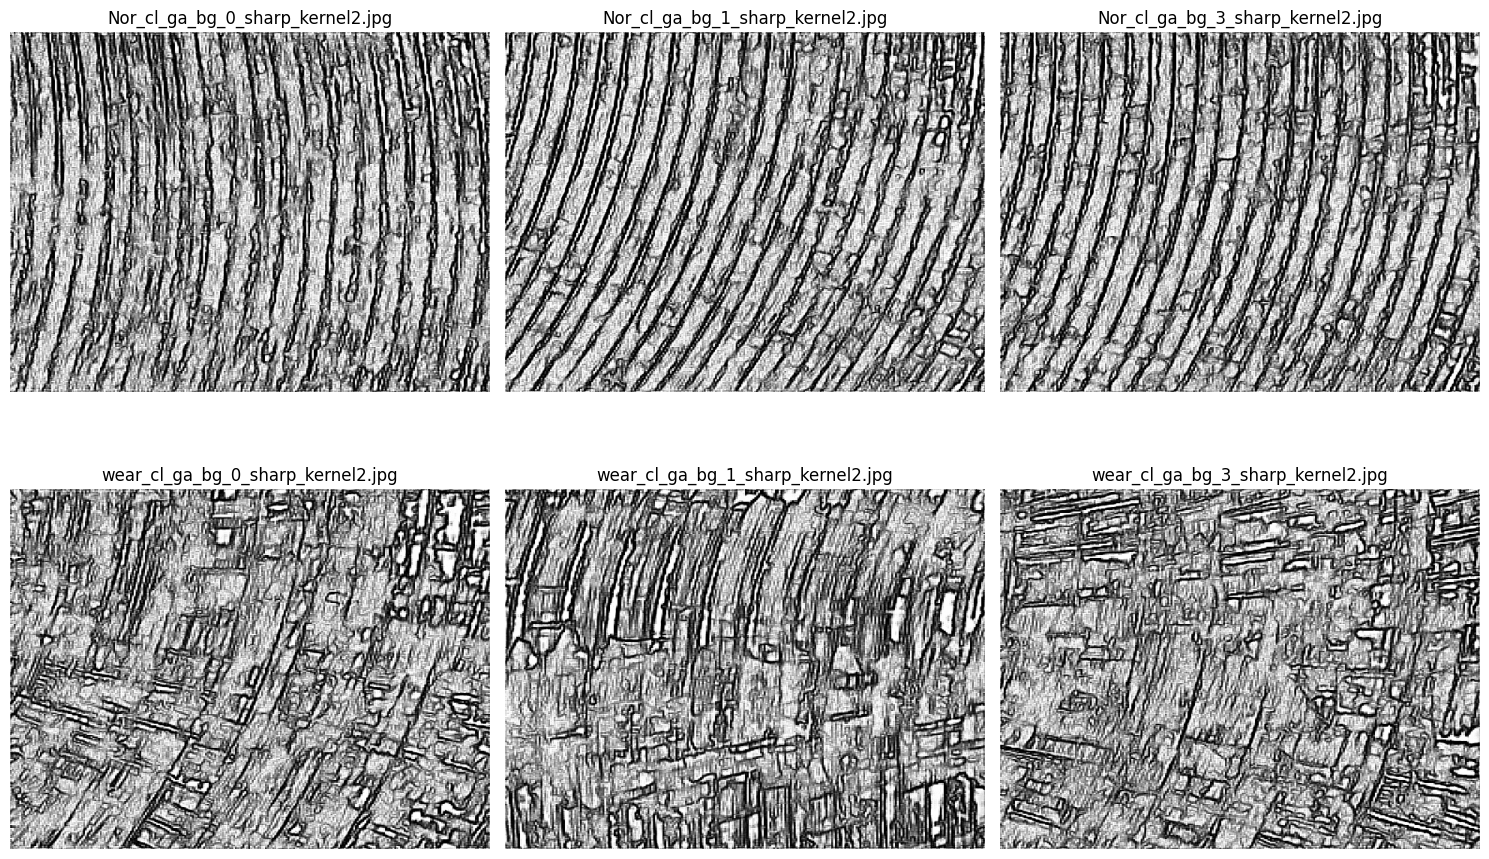

In [90]:


# 이미지가 있는 로컬 경로를 지정합니다. (예시로 폴더 경로를 'images'라고 가정합니다.)
folder_path = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\dexi_result'

# 원하는 이미지 파일들의 이름을 리스트에 추가합니다.
selected_images = [ 'Nor_cl_ga_bg_0_sharp_kernel2.jpg','Nor_cl_ga_bg_1_sharp_kernel2.jpg','Nor_cl_ga_bg_3_sharp_kernel2.jpg',
                   'wear_cl_ga_bg_0_sharp_kernel2.jpg','wear_cl_ga_bg_1_sharp_kernel2.jpg','wear_cl_ga_bg_3_sharp_kernel2.jpg']

# Create a 2x3 grid to plot the images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 선택한 이미지 파일들을 순회하며 하나씩 로드하고 시각화합니다.
for i, image_file in enumerate(selected_images):
    image_path = os.path.join(folder_path, image_file)
    
    # 이미지를 로드합니다.
    image = cv2.imread(image_path)
    
    # 이미지를 시각화합니다.
    ax = axes[i//3, i%3]  # Determine the row and column indices for the subplot
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(image_file)  # 이미지 파일 이름을 제목으로 표시합니다.
    ax.axis('off')  # 축을 제거하여 이미지 위에 좌표를 표시하지 않습니다.

plt.tight_layout()
plt.show()


# 분류기

In [1]:
import torch
import torchvision
# from fastai.vision.all import * 
import time
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }');
import cv2
import numpy as np, cv2
import matplotlib.pylab as plt
import os
import cv2

from PIL import Image
import os

import numpy as np, cv2
# import matplotlib.pylab as plt
import os
import cv2

from fastai.vision.all import * 
from fastai.metrics import *

import os

from fastai.callback.tracker import EarlyStoppingCallback

from fastai.vision.all import get_image_files, PILImage


## 데이터로더 생성

In [2]:
path = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\dexi_result'


# path = '/content/drive/MyDrive/cnn_cnc/all_blur'
files= get_image_files(path)

#라벨링 함수
def label_func(fname):
    
      if fname[0].isupper():
        return 'Nor'
    
      else:
        return 'Wear'

dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224), batch_size=16)

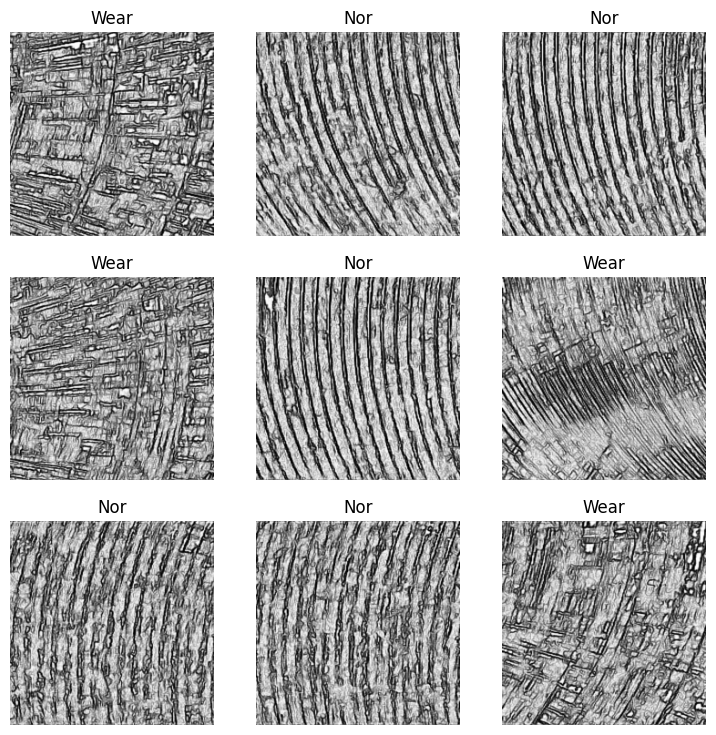

In [3]:
  # 학습 데이터셋에 대한 데이터 로더
dls.show_batch() # 첫 번째 배치의 이미지 시각화

## train

In [12]:
lrnr = cnn_learner(dls, densenet121, metrics=accuracy)

C:\Users\31083\anaconda3\envs\test_envs\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Better model found at epoch 0 with valid_loss value: 0.5125904083251953.


Better model found at epoch 0 with valid_loss value: 0.6423594951629639.
Better model found at epoch 2 with valid_loss value: 0.44953984022140503.
Better model found at epoch 3 with valid_loss value: 0.3658386468887329.
Better model found at epoch 4 with valid_loss value: 0.29873597621917725.
Better model found at epoch 5 with valid_loss value: 0.2865995764732361.
Better model found at epoch 6 with valid_loss value: 0.18183352053165436.
Better model found at epoch 7 with valid_loss value: 0.1369708776473999.
Better model found at epoch 8 with valid_loss value: 0.10523894429206848.
Better model found at epoch 11 with valid_loss value: 0.0798790454864502.
No improvement since epoch 11: early stopping


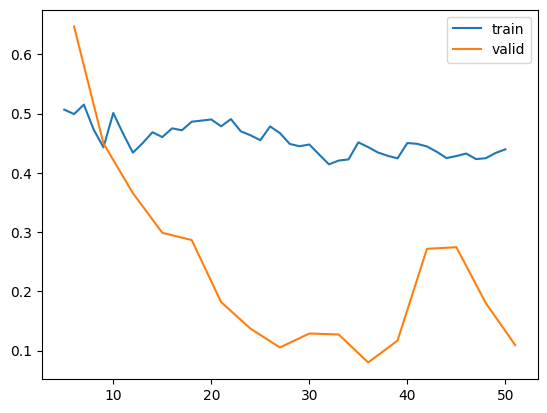

In [13]:
# EarlyStopping and SaveModel 콜백 함수 정의
early_stopping_cb = EarlyStoppingCallback(monitor='valid_loss', patience=5)
save_model_cb = SaveModelCallback(monitor='valid_loss', fname= r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\CF_best_model')

# fine-tuning 수행
lrnr.fine_tune(30, cbs=[early_stopping_cb, save_model_cb])

# 로스값 시각화
lrnr.recorder.plot_loss()


In [14]:
cf_model = lrnr.load(r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\CF_best_model')

C:\Users\31083\anaconda3\envs\test_envs\lib\site-packages\fastai\learner.py:59: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


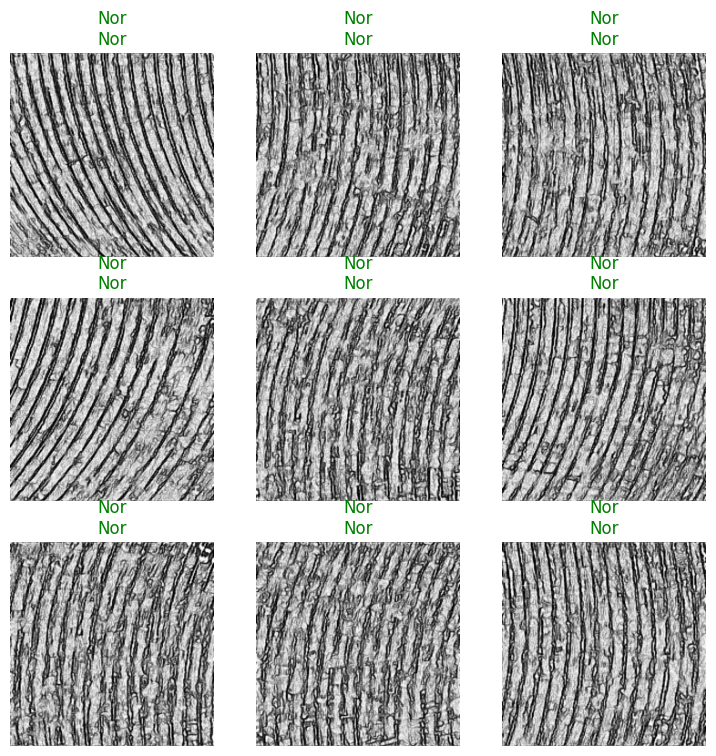

In [15]:
cf_model.show_results()

## Test

In [16]:
img_dir = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\surface_test' 
test_files= get_image_files(img_dir)

Image file name: Nor_cl_ga_bg_0_sharp_kernel2.jpg


('Nor', tensor(0), tensor([0.9416, 0.0584]))


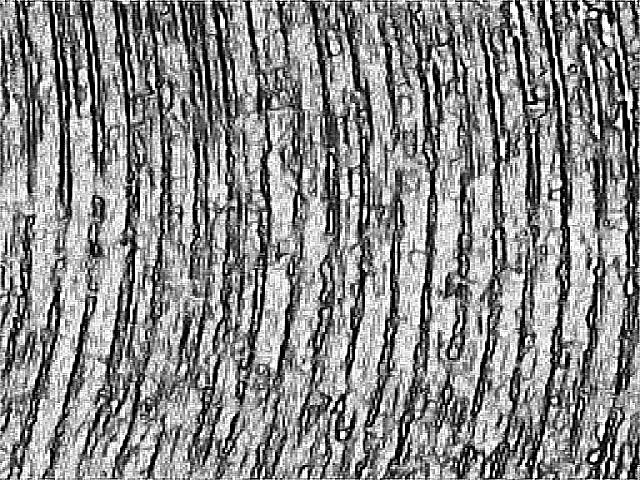

In [ ]:

image_path = test_files[0]
file_name = os.path.basename(image_path)
print("Image file name:", file_name)

print(cf_model.predict(PILImage.create(image_path)))
PILImage.create(image_path)

Image file name: Nor_cl_ga_bg_3_sharp_kernel2.jpg


('Nor', tensor(0), tensor([0.8335, 0.1665]))


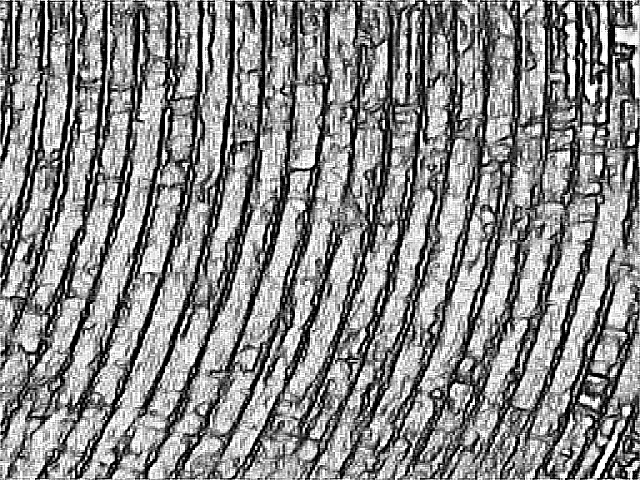

In [18]:
image_path = test_files[4]
file_name = os.path.basename(image_path)
print("Image file name:", file_name)

print(cf_model.predict(PILImage.create(image_path)))
PILImage.create(image_path)

Image file name: wear_cl_ga_bg_40_sharp_kernel2.jpg


('Wear', tensor(1), tensor([0.0791, 0.9209]))


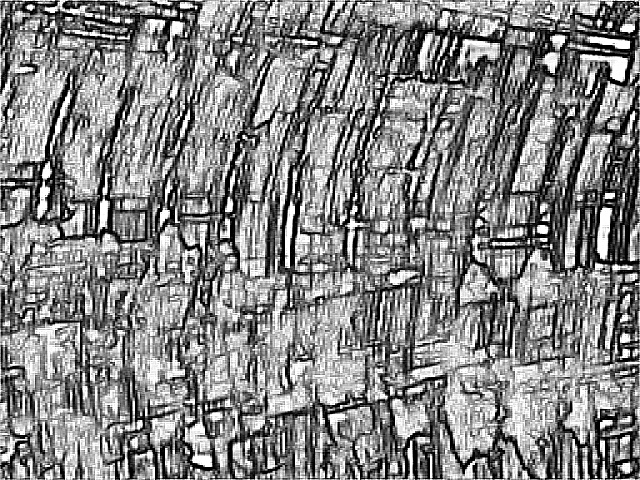

In [19]:
image_path = test_files[14]
file_name = os.path.basename(image_path)
print("Image file name:", file_name)

print(cf_model.predict(PILImage.create(image_path)))
PILImage.create(image_path)

Image file name: wear_cl_ga_bg_29_sharp_kernel2.jpg


('Wear', tensor(1), tensor([0.0624, 0.9376]))


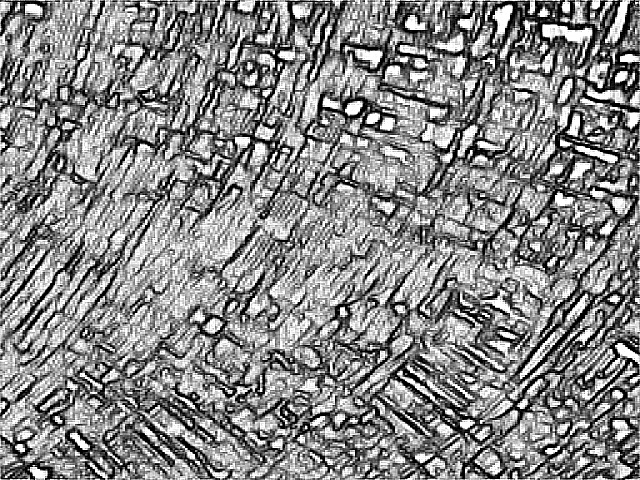

In [21]:
image_path = test_files[11]
file_name = os.path.basename(image_path)
print("Image file name:", file_name)

print(cf_model.predict(PILImage.create(image_path)))
PILImage.create(image_path)

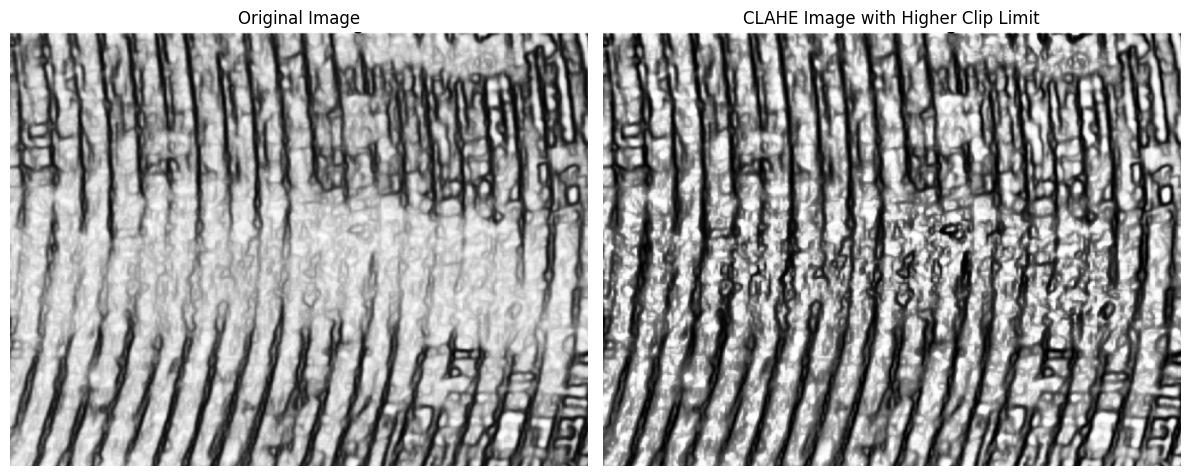

In [16]:
import cv2
import matplotlib.pyplot as plt

img_path = r"C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Seminar_Presentation\hi.png" 

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)




# Apply CLAHE with a higher clip limit
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(10,10))
clahe_img = clahe.apply(img)

# Display the original and clahe images again
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(clahe_img, cmap='gray')
ax[1].set_title("CLAHE Image with Higher Clip Limit")
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [5]:
type(img)

NoneType